In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score, accuracy_score
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [3]:
# Load dataset
hr_data = pd.read_csv('HR-Employee-Attrition.csv')
hr_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
hr_data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [5]:
hr_data['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [12]:
hr_data['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [5]:
# Checking for missing values
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Checking for duplicates
hr_data.duplicated().sum()

0

In [7]:
# Basic overview
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Distribution of Attrition
hr_data['Attrition'].value_counts()/hr_data.shape[0]*100

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64

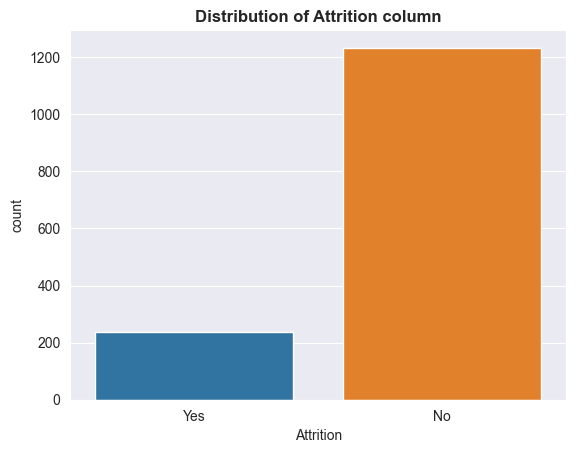

In [9]:
sns.countplot(x=hr_data['Attrition'])
plt.title("Distribution of Attrition column", fontweight='bold')
plt.show()

In [10]:
hr_data.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

In [11]:
hr_data.select_dtypes(exclude='object')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


In [12]:
hr_data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [13]:
hr_data.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [14]:
hr_data['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [15]:
cat_cols = hr_data.select_dtypes('object').columns
num_cols = hr_data.select_dtypes(exclude='object').columns

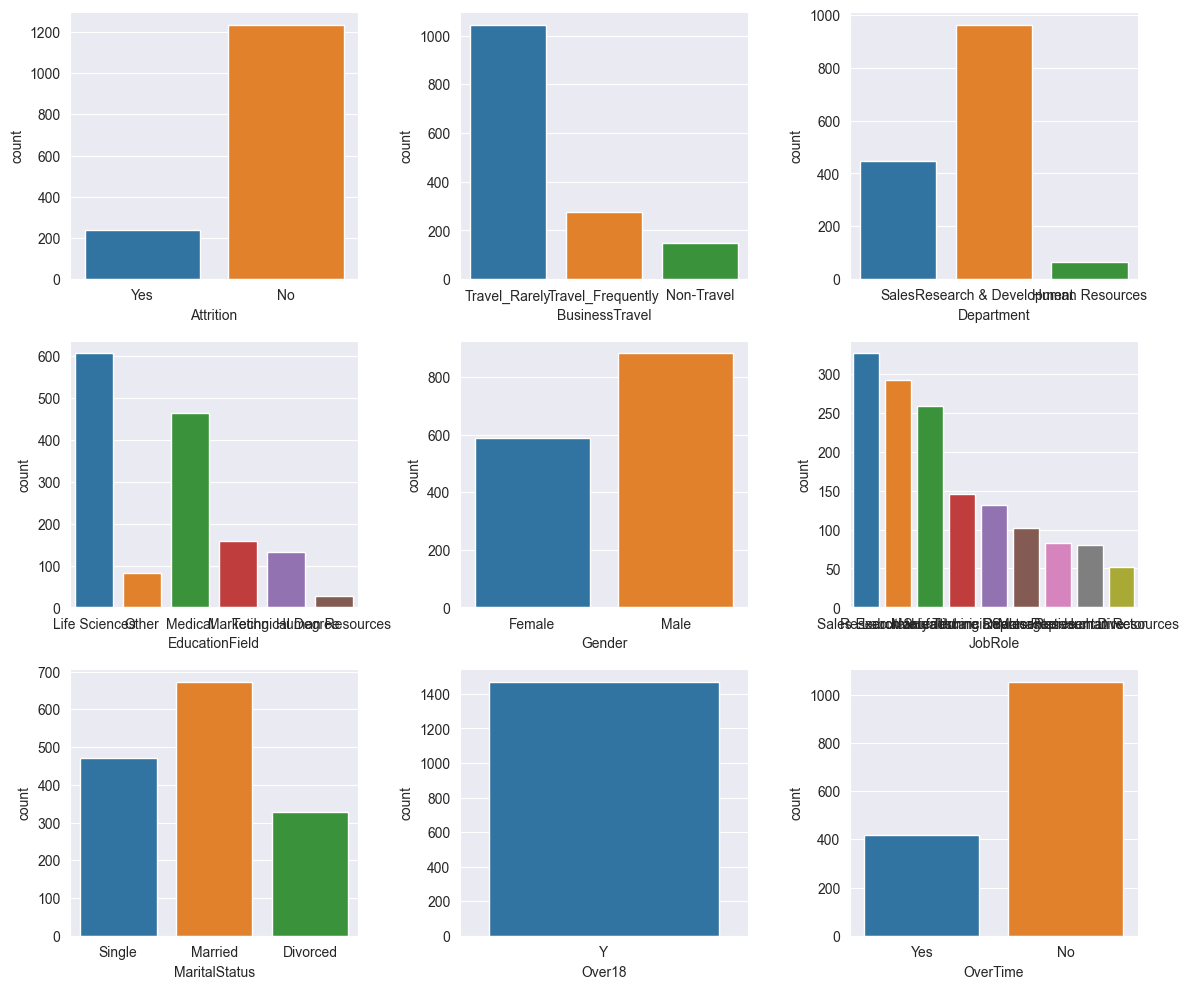

In [16]:
plt.figure(figsize=(12,10))
for index, col in enumerate(cat_cols):
    plt.subplot(3,3, index+1)
    sns.countplot(x=col, data = hr_data)
plt.tight_layout()

In [17]:
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

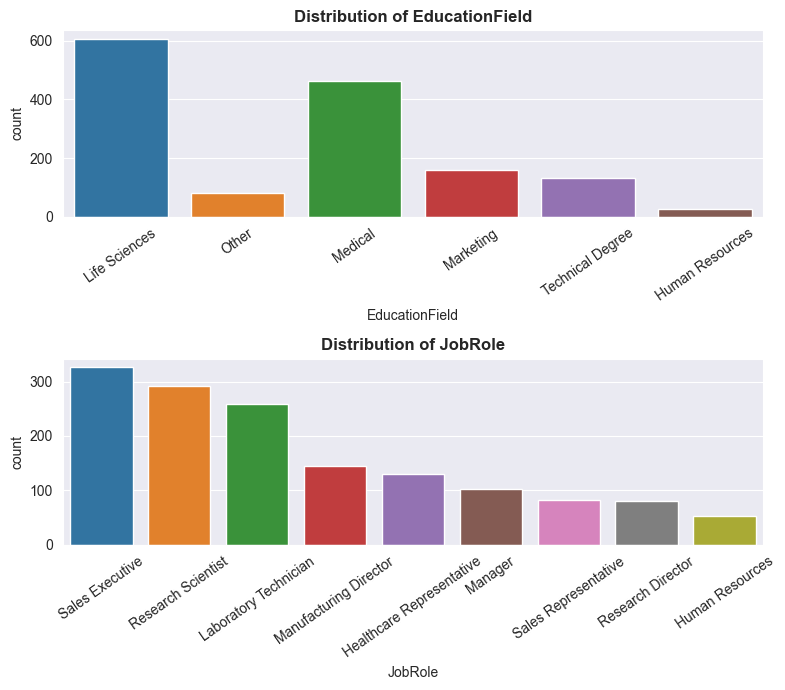

In [18]:
plt.figure(figsize=(8,7))
for index, i in enumerate(['EducationField', 'JobRole']):
    plt.subplot(2,1, index+1)
    sns.countplot(x=i, data=hr_data)
    plt.title(f"Distribution of {i}", fontweight='bold')
    plt.xticks(rotation=35)
plt.tight_layout()

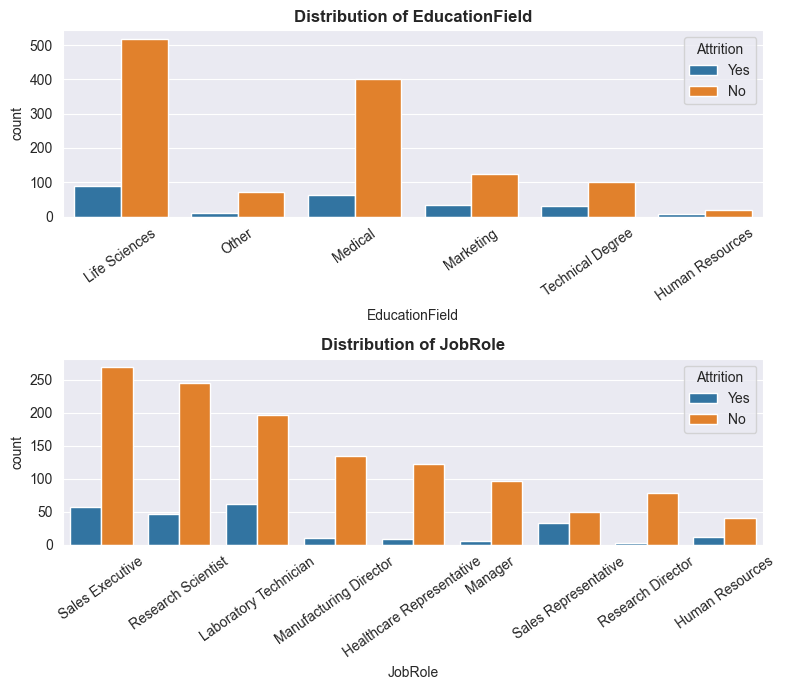

In [19]:
plt.figure(figsize=(8,7))
for index, i in enumerate(['EducationField', 'JobRole']):
    plt.subplot(2,1, index+1)
    sns.countplot(x=i, data=hr_data, hue='Attrition')
    plt.title(f"Distribution of {i}", fontweight='bold')
    plt.xticks(rotation=35)
plt.tight_layout()

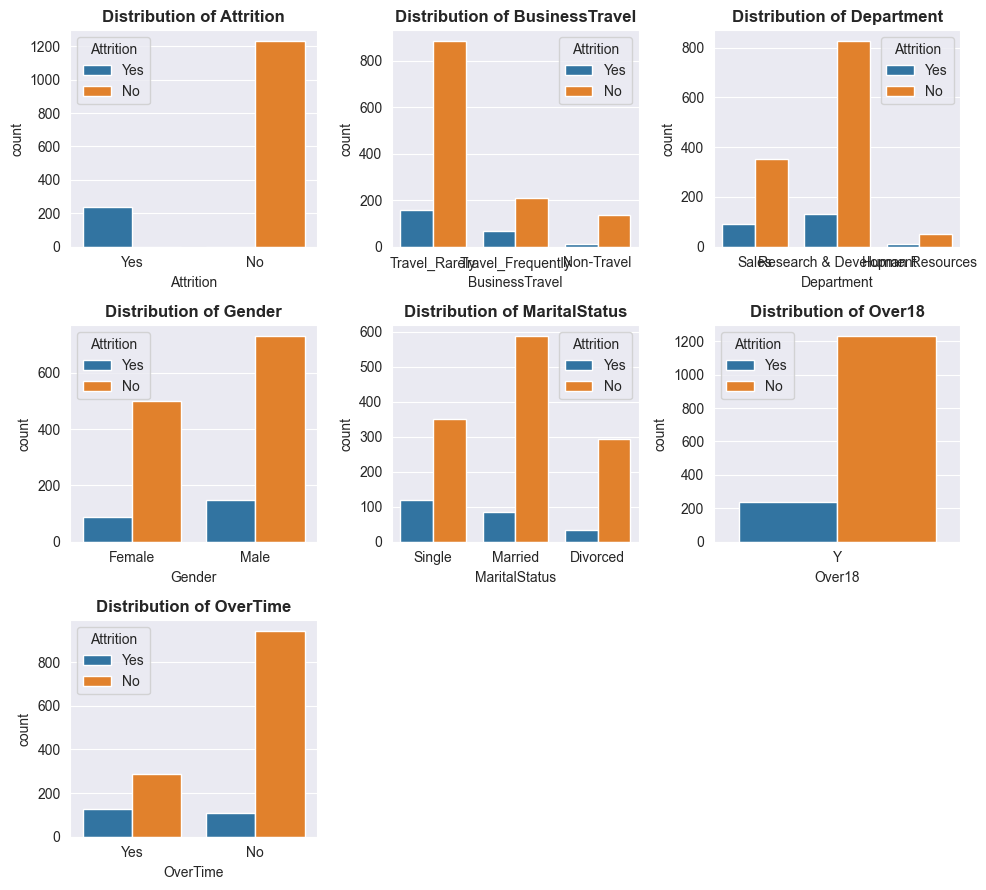

In [20]:
cols = cat_cols.difference(['EducationField', 'JobRole'])

plt.figure(figsize=(10,9))
for index, i in enumerate(cols):
    plt.subplot(3,3, index+1)
    sns.countplot(x=i, data=hr_data, hue='Attrition')
    plt.title(f"Distribution of {i}", fontweight='bold')
plt.tight_layout()

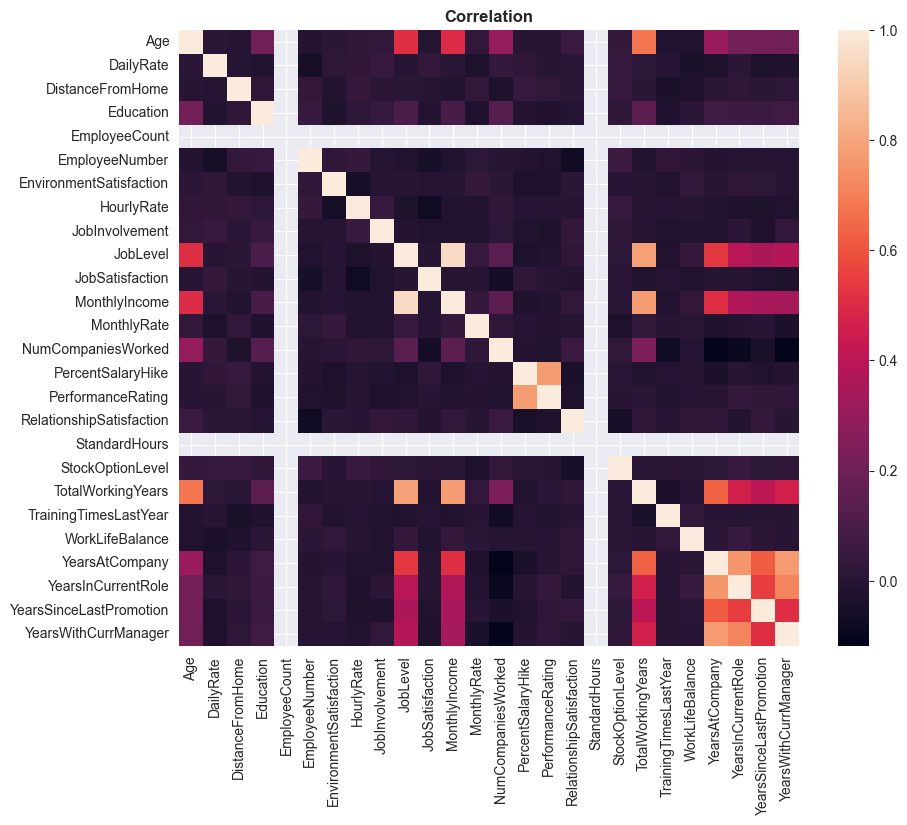

In [21]:
plt.figure(figsize=(10,8))
corr = hr_data[num_cols].corr()
sns.heatmap(corr)
plt.title("Correlation", fontweight='bold')
plt.show()

In [22]:
col_1 = num_cols[:13]
col_2 = num_cols[13:]

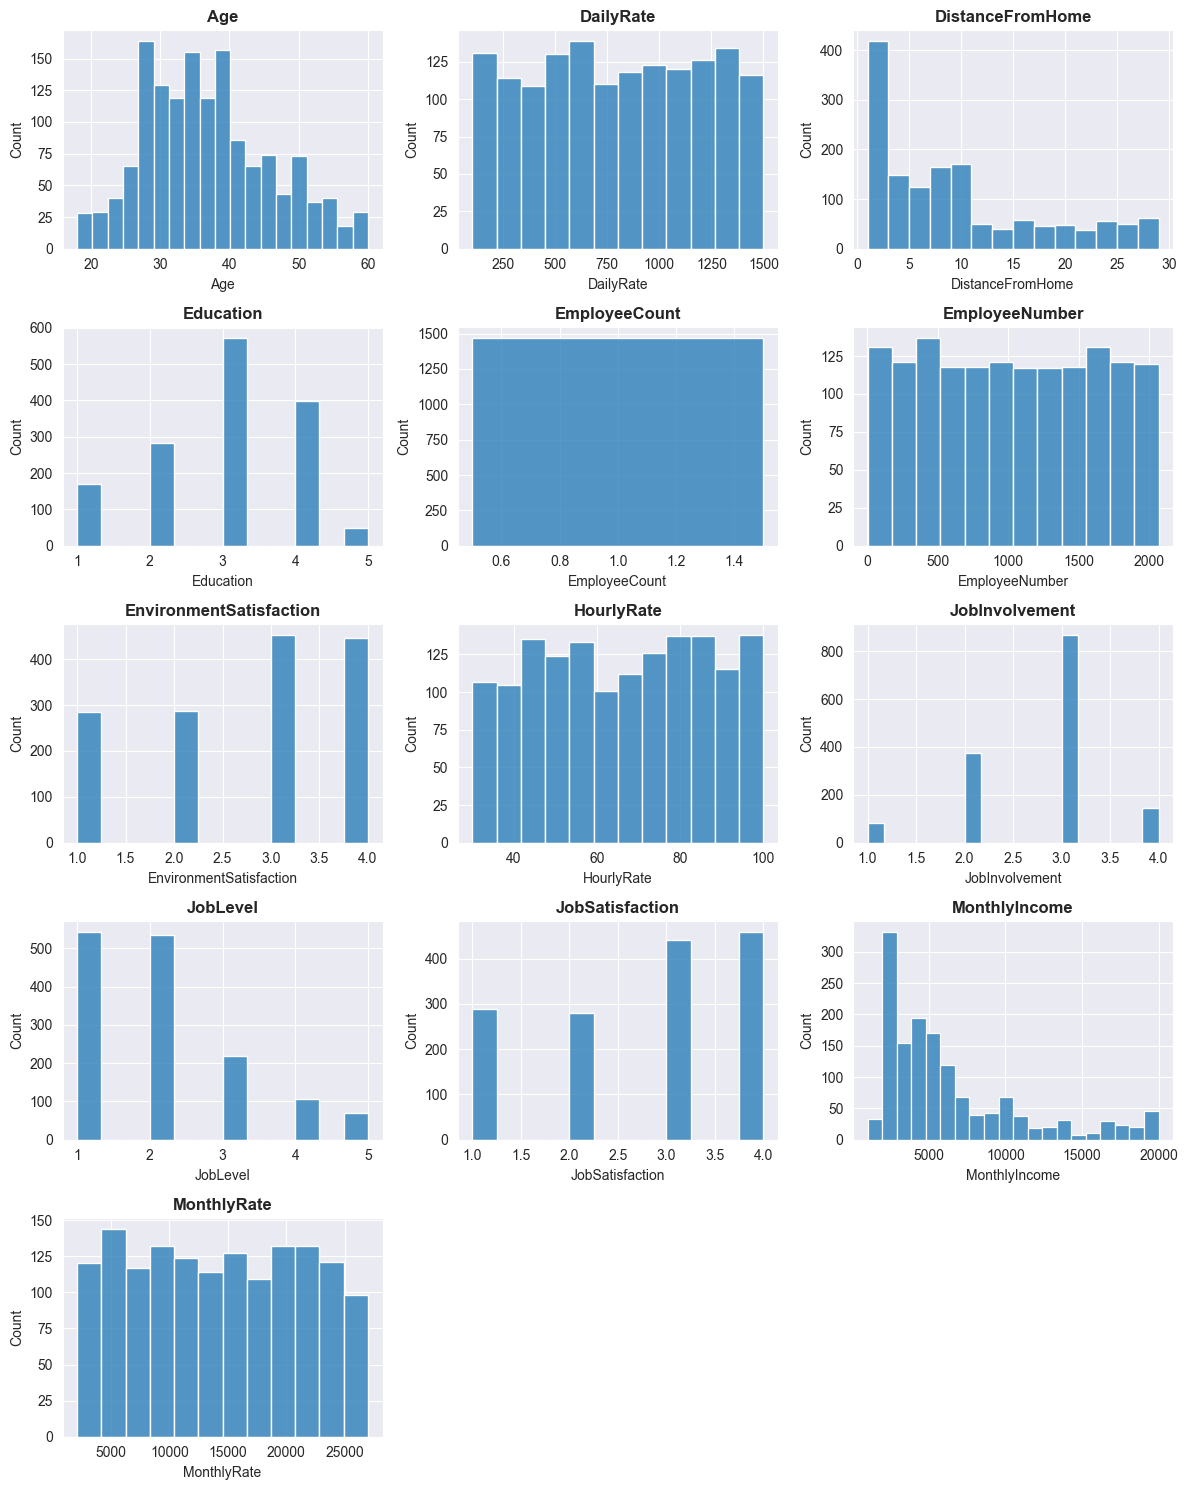

In [23]:
plt.figure(figsize=(12,15))
for index, c in enumerate(col_1):
    plt.subplot(5,3, index+1)
    sns.histplot(x=c, data=hr_data)
    plt.title(f"{c}", fontweight='bold')
plt.tight_layout()

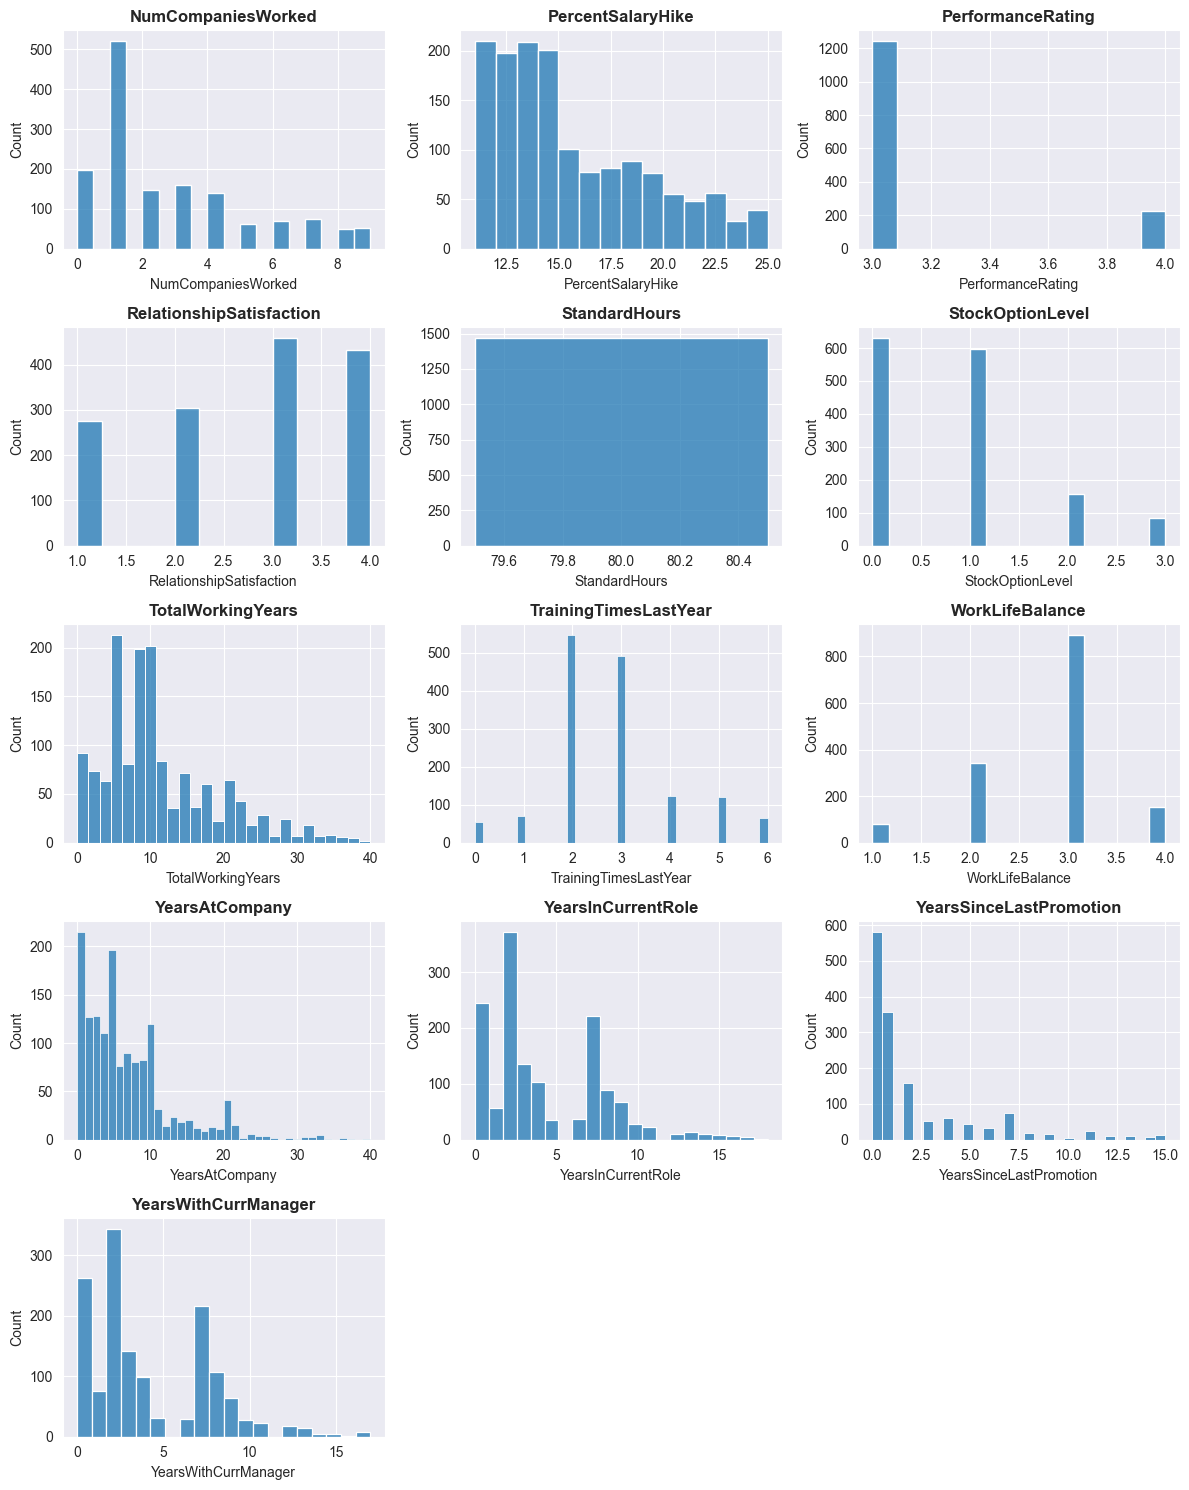

In [24]:
plt.figure(figsize=(12,15))
for index, c in enumerate(col_2):
    plt.subplot(5,3, index+1)
    sns.histplot(x=c, data=hr_data)
    plt.title(f"{c}", fontweight='bold')
plt.tight_layout()

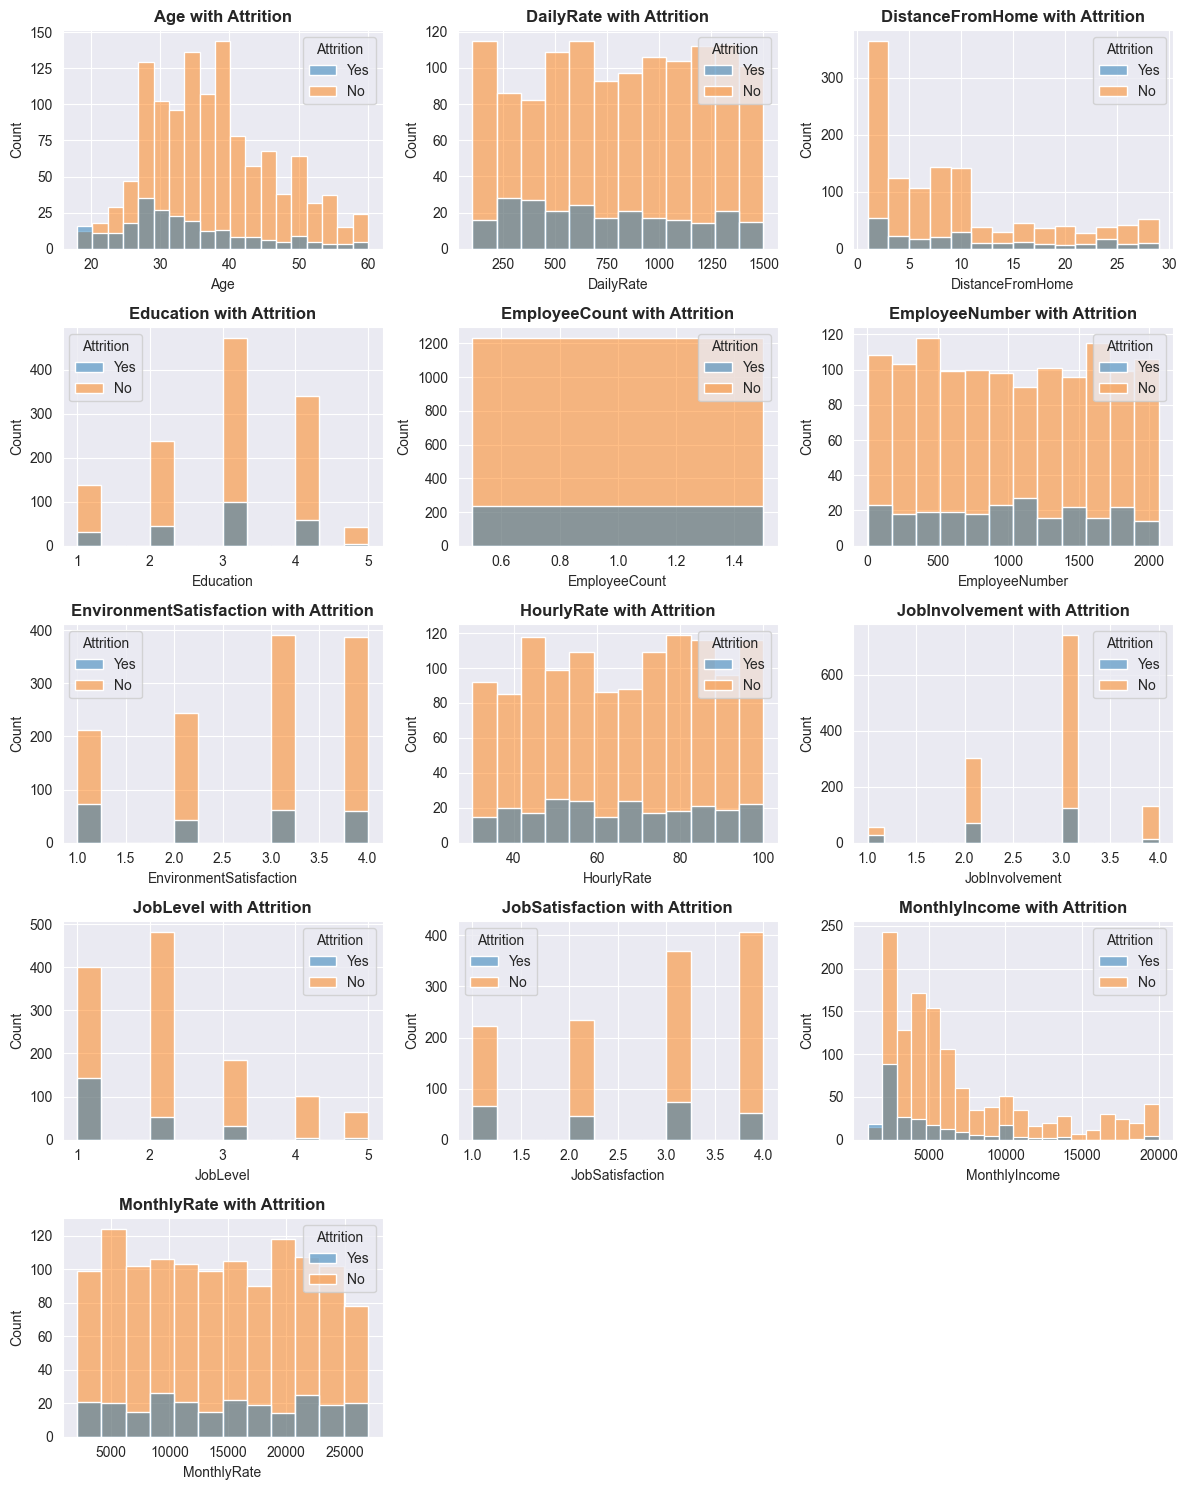

In [25]:
plt.figure(figsize=(12,15))
for index, c in enumerate(col_1):
    plt.subplot(5,3, index+1)
    sns.histplot(x=c, data=hr_data, hue='Attrition')
    plt.title(f"{c} with Attrition", fontweight='bold')
plt.tight_layout()

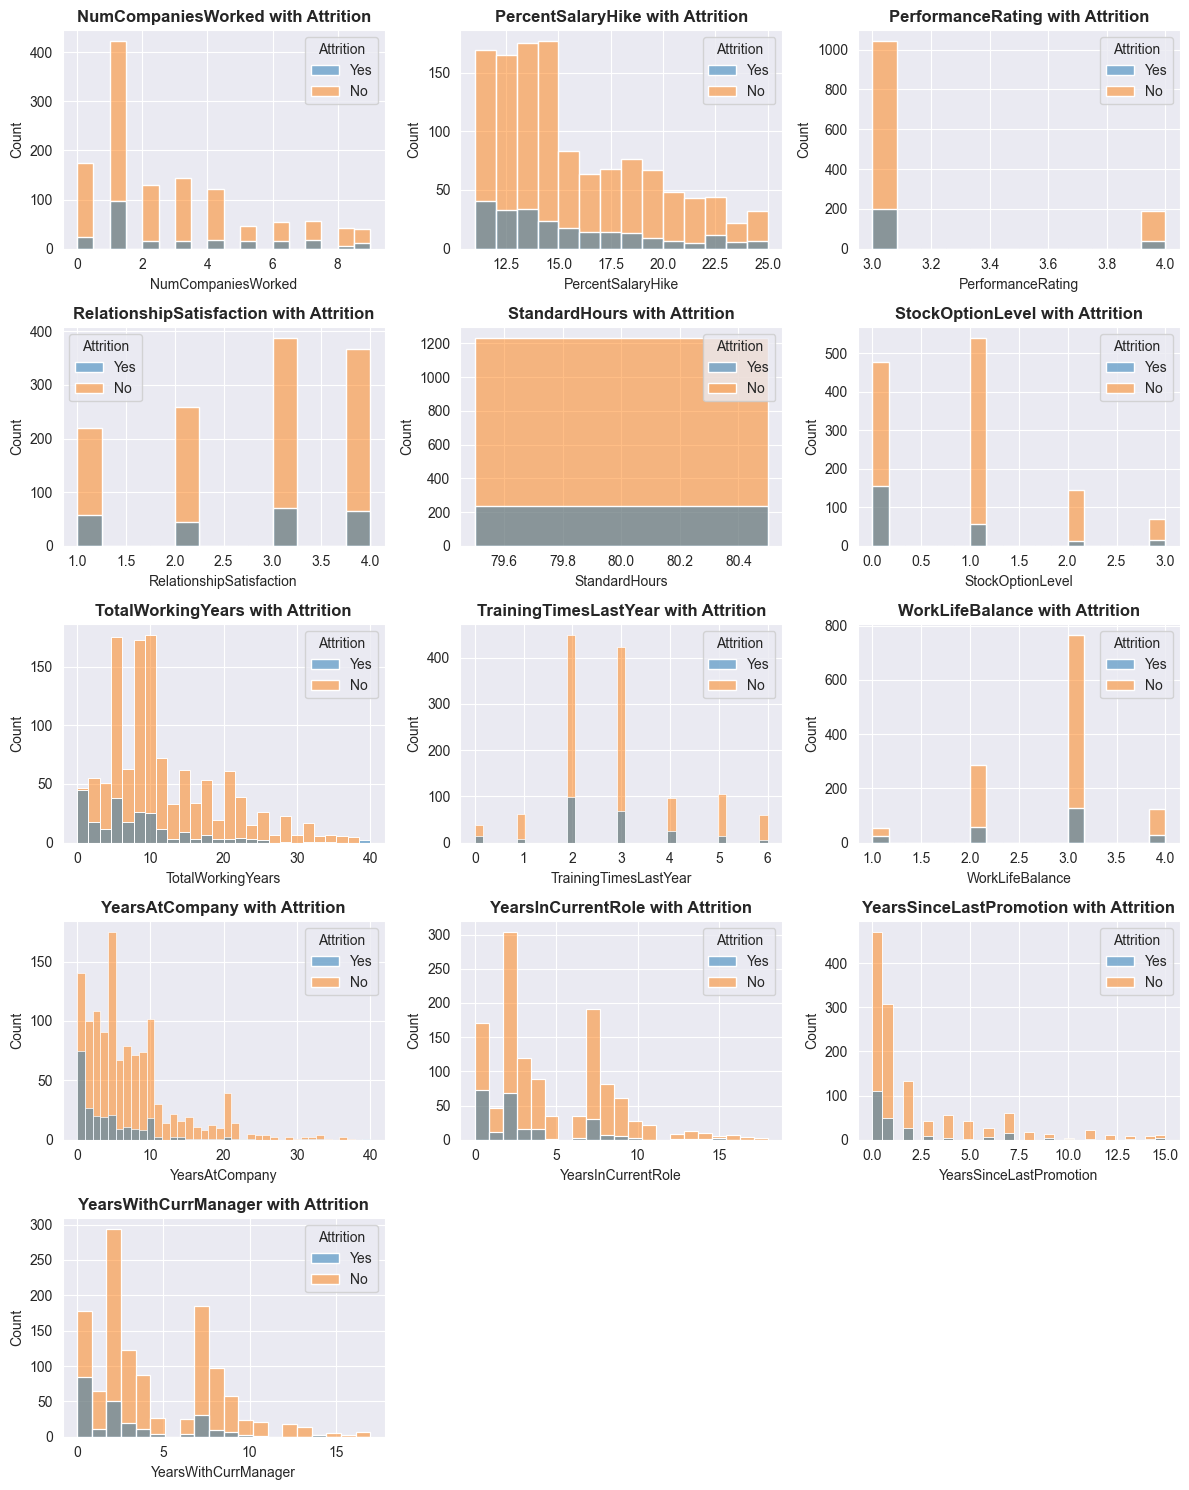

In [26]:
plt.figure(figsize=(12,15))
for index, c in enumerate(col_2):
    plt.subplot(5,3, index+1)
    sns.histplot(x=c, data=hr_data, hue='Attrition')
    plt.title(f"{c} with Attrition", fontweight='bold')
plt.tight_layout()

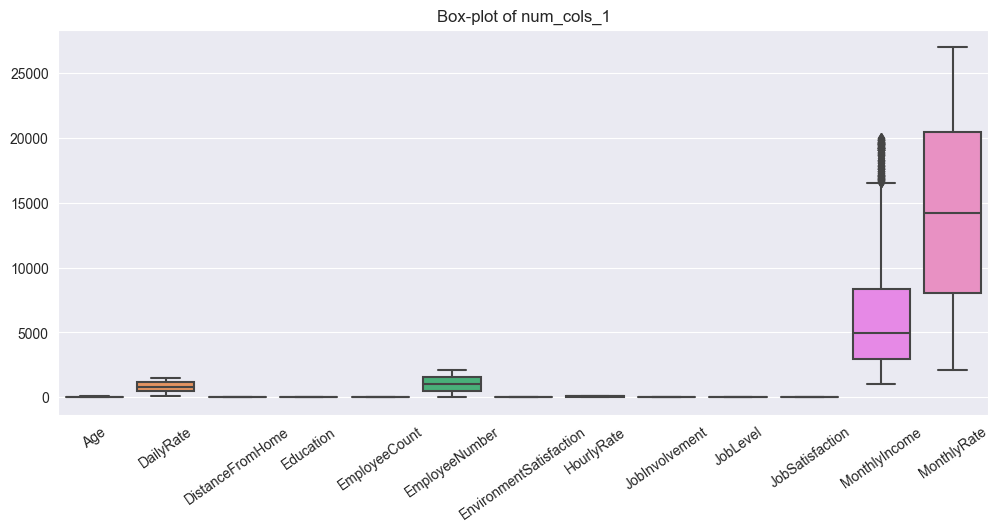

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(hr_data[col_1])
plt.xticks(rotation=35)
plt.title("Box-plot of num_cols_1")
plt.show()

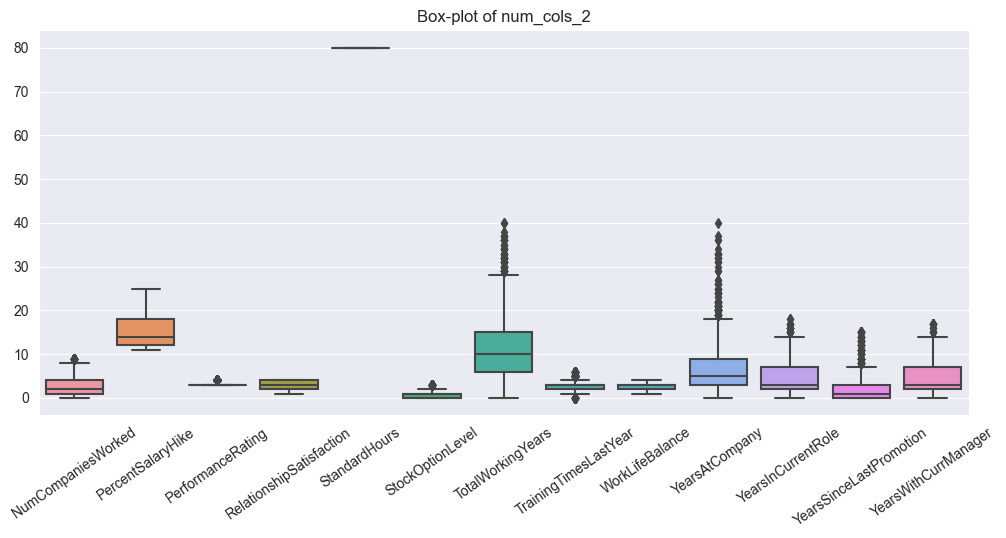

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(hr_data[col_2])
plt.xticks(rotation=35)
plt.title("Box-plot of num_cols_2")
plt.show()

## Data Preprocessing

In [29]:
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [30]:
# Removing irrelevant features
hr_data = hr_data.drop(columns=['EmployeeNumber', 'Over18', 'EmployeeCount', 'StandardHours', 'Age'])

In [31]:
cat_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [32]:
# BusinessTravel
hr_data['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [33]:
# Encoding BusinessTravel
hr_data['BusinessTravel'] = hr_data['BusinessTravel'].replace({'Travel_Rarely': 1, 'Non-Travel':0,'Travel_Frequently':2 })

In [34]:
cat_columns = hr_data.select_dtypes('object').columns.difference(['Attrition'])
num_columns = hr_data.select_dtypes(exclude='object').columns

In [35]:
x = hr_data.drop(columns=['Attrition'])
y =hr_data['Attrition']

In [36]:
# Data Partioning
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [37]:
cat_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder()),
    ('ss', StandardScaler(with_mean=False))
])

In [38]:
num_pipeline = Pipeline([
    ('si', SimpleImputer(strategy='median')),
    ('ss', StandardScaler(with_mean=False))
])

In [39]:
transformer = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, cat_columns),
    ('num_pipeline', num_pipeline, num_columns)
])

In [40]:
X_train_new = transformer.fit_transform(X_train)
X_test_new = transformer.transform(X_test)

In [41]:
# Encoding target feature
le = LabelEncoder()
y_train_new = le.fit_transform(y_train)
y_test_new = le.transform(y_test)

In [42]:
# Over-sampling minority class 
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_new, y_train_new)

In [43]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    return accuracy

### Model Evaluation

In [44]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}

model_list = []
accuracy_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_balanced, y_train_balanced)
    
    y_train_pred = model.predict(X_train_balanced)
    y_test_pred = model.predict(X_test_new)
    
    model_train_accuracy_score = evaluate_model(y_train_balanced, y_train_pred)
    model_test_accuracy_score = evaluate_model(y_test_new, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance on Train set:")
    print("Accuracy_score : {:.2f}".format(model_train_accuracy_score))
    print()
    print("Model Performance on Test set:")
    print("Accuracy_score : {:.2f}".format(model_test_accuracy_score))
    
    accuracy_score_list.append(model_test_accuracy_score)
    
    print("="*35)
    print("\n")

Logistic Regression
Model Performance on Train set:
Accuracy_score : 0.82

Model Performance on Test set:
Accuracy_score : 0.76


Decision Tree
Model Performance on Train set:
Accuracy_score : 1.00

Model Performance on Test set:
Accuracy_score : 0.78




Random Forest
Model Performance on Train set:
Accuracy_score : 1.00

Model Performance on Test set:
Accuracy_score : 0.84


AdaBoost
Model Performance on Train set:
Accuracy_score : 0.92

Model Performance on Test set:
Accuracy_score : 0.83


Gradient Boosting
Model Performance on Train set:
Accuracy_score : 0.97

Model Performance on Test set:
Accuracy_score : 0.85


K-Nearest Classifier
Model Performance on Train set:
Accuracy_score : 0.89

Model Performance on Test set:
Accuracy_score : 0.67


Support Vector Classifier
Model Performance on Train set:
Accuracy_score : 0.88

Model Performance on Test set:
Accuracy_score : 0.83




#### Logistic Regression

In [45]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_balanced, y_train_balanced)

y_test_pred = log_reg.predict(X_test_new)
print(f"Accuracy score : {accuracy_score(y_test_new, y_test_pred)}")


Accuracy score : 0.7551020408163265


#### Random Forest

In [46]:
r_forest = RandomForestClassifier()
r_forest.fit(X_train_balanced, y_train_balanced)

y_test_pred = r_forest.predict(X_test_new)
print(f"Accuracy score : {accuracy_score(y_test_new, y_test_pred)}")

Accuracy score : 0.8537414965986394


#### Gradient Boosting

In [47]:
g_boost = GradientBoostingClassifier()
g_boost.fit(X_train_balanced, y_train_balanced)

y_test_pred = g_boost.predict(X_test_new)
print(f"Accuracy score : {accuracy_score(y_test_new, y_test_pred)}")

Accuracy score : 0.8469387755102041


#### AdaBoost Classifier

In [48]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train_balanced, y_train_balanced)

y_test_pred = ada_boost.predict(X_test_new)
print(f"Accuracy score : {accuracy_score(y_test_new, y_test_pred)}")

Accuracy score : 0.8333333333333334
